In [ ]:
!nvidia-smi

Sun Jun  2 14:33:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
pip install tensorflow-gpu==2.8.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing insta

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below


from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/DATAINSECTO/train'
valid_path = '/content/drive/MyDrive/DATAINSECTO/val'

In [ ]:

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/DATAINSECTO/train/*')

In [ ]:
folders

['/content/drive/MyDrive/DATAINSECTO/train/PULGON VERDE',
 '/content/drive/MyDrive/DATAINSECTO/train/ARAÑA ROJA',
 '/content/drive/MyDrive/DATAINSECTO/train/MOSCA BLANCA',
 '/content/drive/MyDrive/DATAINSECTO/train/MOSCA FRUTA',
 '/content/drive/MyDrive/DATAINSECTO/train/PICUDO ROJO']

In [ ]:
# Nuestras capas: puedes agregar más si lo deseas.

x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# crear un objeto modelo
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# ver la estructura del modelo
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Utilice el Generador de datos de imágenes para importar las imágenes del conjunto de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Asegúrese de proporcionar el mismo tamaño de destino inicializado para el tamaño de la imagen.
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DATAINSECTO/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 750 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DATAINSECTO/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 175 images belonging to 5 classes.


In [ ]:
# Obtener el diccionario de asignación de clases
class_indices = training_set.class_indices

In [ ]:
# Invertir el diccionario para obtener una asignación de índice a clase
indices_class = {v: k for k, v in class_indices.items()}

In [ ]:
# Imprimir el diccionario de asignación de índices a clases
print("Asignación de índices a clases:")
print(indices_class)

Asignación de índices a clases:
{0: 'ARAÑA ROJA', 1: 'MOSCA BLANCA', 2: 'MOSCA FRUTA', 3: 'PICUDO ROJO', 4: 'PULGON VERDE'}


In [ ]:
# Mapear las clases a etiquetas
labels = [indices_class[i] for i in range(len(class_indices))]

# Imprimir las etiquetas
print("Etiquetas de las clases:")
print(labels)

Etiquetas de las clases:
['ARAÑA ROJA', 'MOSCA BLANCA', 'MOSCA FRUTA', 'PICUDO ROJO', 'PULGON VERDE']


In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-21-935eee5e1fc9>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/30
24/24 [==============================] - 229s 9s/step - loss: 5.6390 - accuracy: 0.2187 - val_loss: 2.7177 - val_accuracy: 0.2686
Epoch 2/30
24/24 [==============================] - 176s 7s/step - loss: 1.9075 - accuracy: 0.3227 - val_loss: 2.5587 - val_accuracy: 0.2800
Epoch 3/30
24/24 [==============================] - 175s 7s/step - loss: 1.7754 - accuracy: 0.3573 - val_loss: 2.7030 - val_accuracy: 0.2971
Epoch 4/30
24/24 [==============================] - 177s 7s/step - loss: 1.7994 - accuracy: 0.3840 - val_loss: 2.3703 - val_accuracy: 0.3486
Epoch 5/30
24/24 [==============================] - 182s 8s/step - loss: 1.6884 - accuracy: 0.4293 - val_loss: 1.8007 - val_accuracy: 0.4286
Epoch 6/30
24/24 [==============================] - 180s 8s/step - loss: 1.4368 - accuracy: 0.4533 - val_loss: 1.8762 - val_accuracy: 0.3771
Epoch 7/30
24/24 [==============================] - 179s 7s/step - loss: 1.5889 - accuracy: 0.4493 - val_loss: 1.8851 - val_accuracy: 0.3371
Epoch 8/30
24

In [ ]:
import matplotlib.pyplot as plt


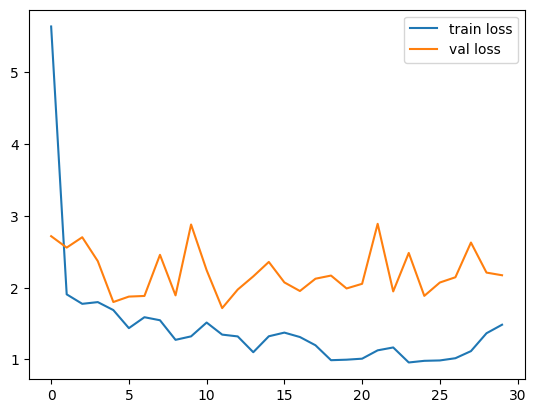

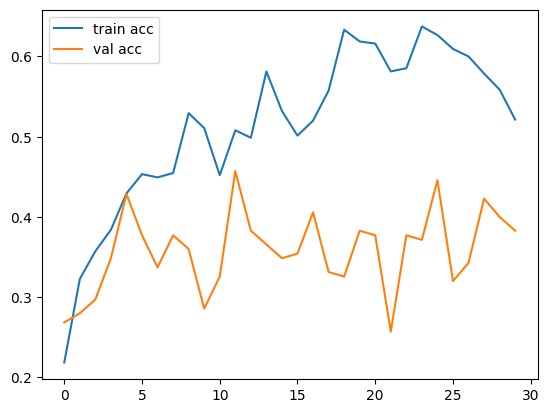

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# guárdalo como un archivo h5

from tensorflow.keras.models import load_model

model.save('modelo_resnet50_5.h5')

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix









# Evaluación del modelo en el conjunto de prueba
test_set.reset()
predictions = model.predict(test_set, steps=len(test_set), verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_set.classes

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


6/6 [==============================] - 31s 5s/step


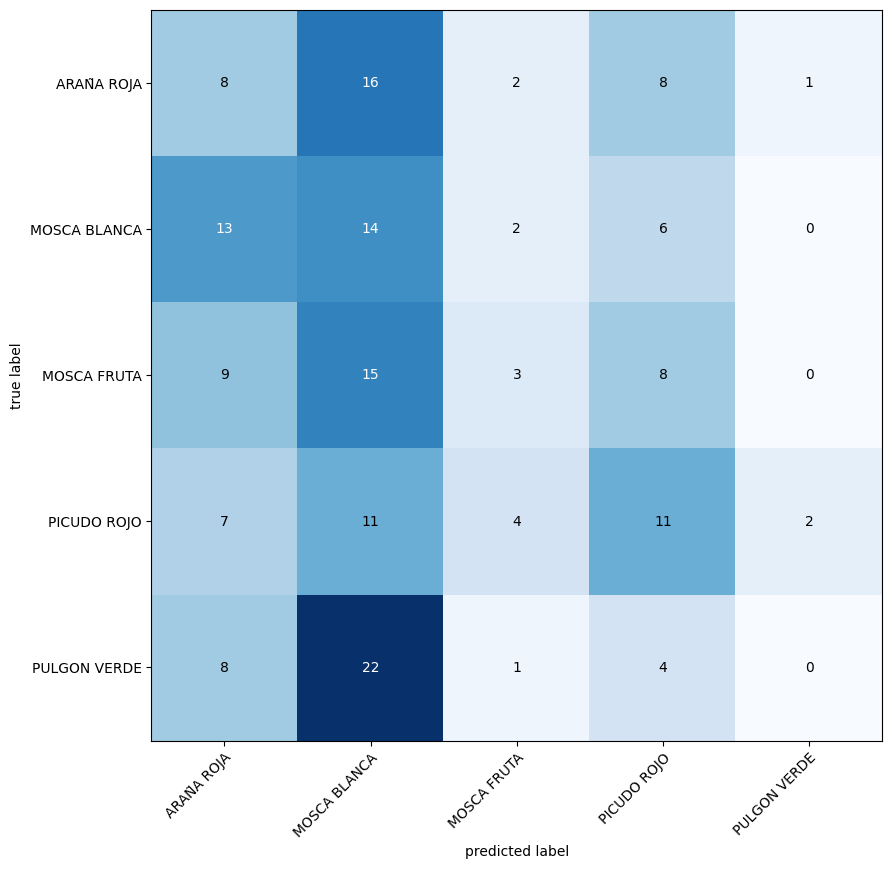

In [ ]:


# Calcular y graficar la matriz de confusión
matc = confusion_matrix(y_true, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(9, 9), class_names=labels, show_normed=False)
plt.tight_layout()
plt.show()

In [ ]:
print(classification_report(y_true, y_pred, target_names=labels, digits=4))


              precision    recall  f1-score   support

 ARAÑA ROJA     0.2414    0.2000    0.2188        35
MOSCA BLANCA     0.1667    0.0286    0.0488        35
 MOSCA FRUTA     0.2000    0.0286    0.0500        35
 PICUDO ROJO     0.2206    0.4286    0.2913        35
PULGON VERDE     0.2239    0.4286    0.2941        35

    accuracy                         0.2229       175
   macro avg     0.2105    0.2229    0.1806       175
weighted avg     0.2105    0.2229    0.1806       175



In [ ]:
# Métricas adicionales
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.2229
Precision: 0.2105
Recall: 0.2229
F1 Score: 0.1806


In [ ]:
img = image.load_img('/content/drive/MyDrive/DATAINSECTO/test/ARAÑA ROJA/ARAÑA ROJA (196).jpg', target_size=(224,224))


In [ ]:
x = image.img_to_array(img)


In [ ]:
x = np.expand_dims(x, axis=0)


In [ ]:
from tensorflow.keras.applications import resnet50

# Assuming 'x' is your input data
x = resnet50.preprocess_input(x)


In [ ]:
predictions = model.predict(x)
